# Time Series Analysis of Apple Stock Price Data

# Introduction
The stock market plays a vital role in the global economy, and predicting stock prices is a critical task for investors and financial institutions. Accurate stock price forecasting can lead to informed investment decisions, optimized portfolios, and improved financial outcomes. In this project, we focused on Apple's stock price data, applying time series analysis techniques to model and predict stock prices for the year 2024. Leveraging historical trends and patterns, the project utilized both statistical and machine learning methodologies to build robust forecasting models.

# Aim
To develop a reliable time series forecasting model for predicting Apple's stock prices in 2024 using advanced statistical and machine learning techniques, ensuring accurate predictions to support informed decision-making.

#Problem Statement
Stock price prediction is a challenging task due to the dynamic and volatile nature of financial markets. Traditional models often fail to capture complex trends and seasonal patterns in stock price data, resulting in inaccurate forecasts. This project aims to address these challenges by analyzing historical Apple stock price data, decomposing it into its core components, and building robust models to predict future prices with improved accuracy.

#Objective


*   Analyze Apple's historical stock price data to identify trends, seasonality, and residual components.
*   Test stationarity of the time series data using ADF and KPSS tests.
*   Build and evaluate time series forecasting models, including ARIMA and SARIMA, using ACF and PACF plots for parameter tuning.
*   Decompose the data into trend, seasonal, and residual components using additive and STL methods to improve model performance.
*   Validate the model using statistical assumptions (e.g., white noise, autocorrelation) and evaluate its accuracy using metrics such as RMSE.









Importing all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

loading the apple stock data

In [ ]:
data =  yf.download('AAPL',start ='2024-01-01')
data.index = data.index.strftime('%Y-%m-%d')
data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351761,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296722,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500
2024-01-09,184.237411,185.139999,185.149994,182.729996,183.919998,42841800
2024-01-10,185.282303,186.190002,186.399994,183.919998,184.350006,46792900
2024-01-11,184.685211,185.589996,187.050003,183.619995,186.539993,49128400


In [ ]:
Visualization of Apple's Closing Stock Price Over Time
plt.figure(figsize=(10,5))
plt.plot(data.index,data['Close'],label="Close Price")
plt.title("Close Price over time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#Decomposition of Apple's Stock Price Time Series
decompostion = seasonal_decompose(data['Close'], model='additive',period=30)
Trend = decompostion.trend
Seasonal = decompostion.seasonal
Residual = decompostion.resid

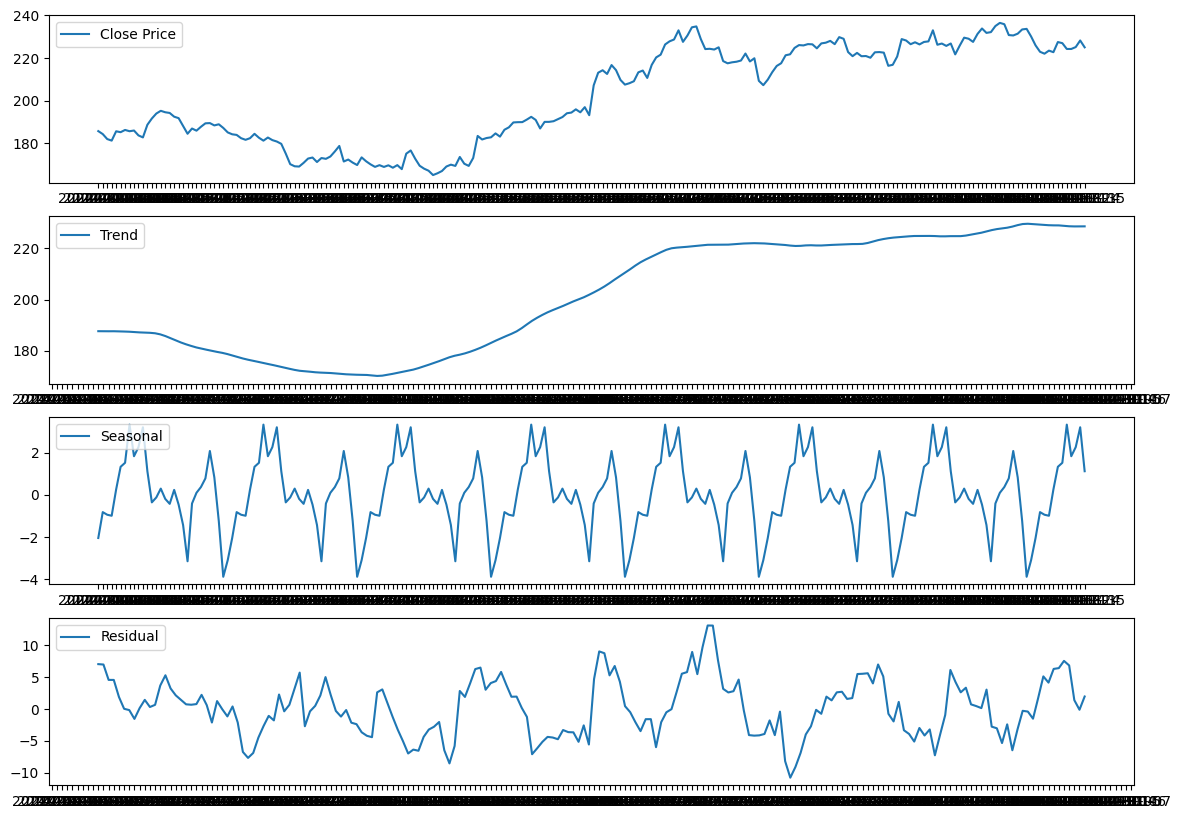

In [ ]:
#Visualization of Time Series Decomposition Components
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(data['Close'],label='Close Price')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(Trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(Seasonal,label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(Residual,label='Residual')
plt.legend(loc='upper left')
plt.show()


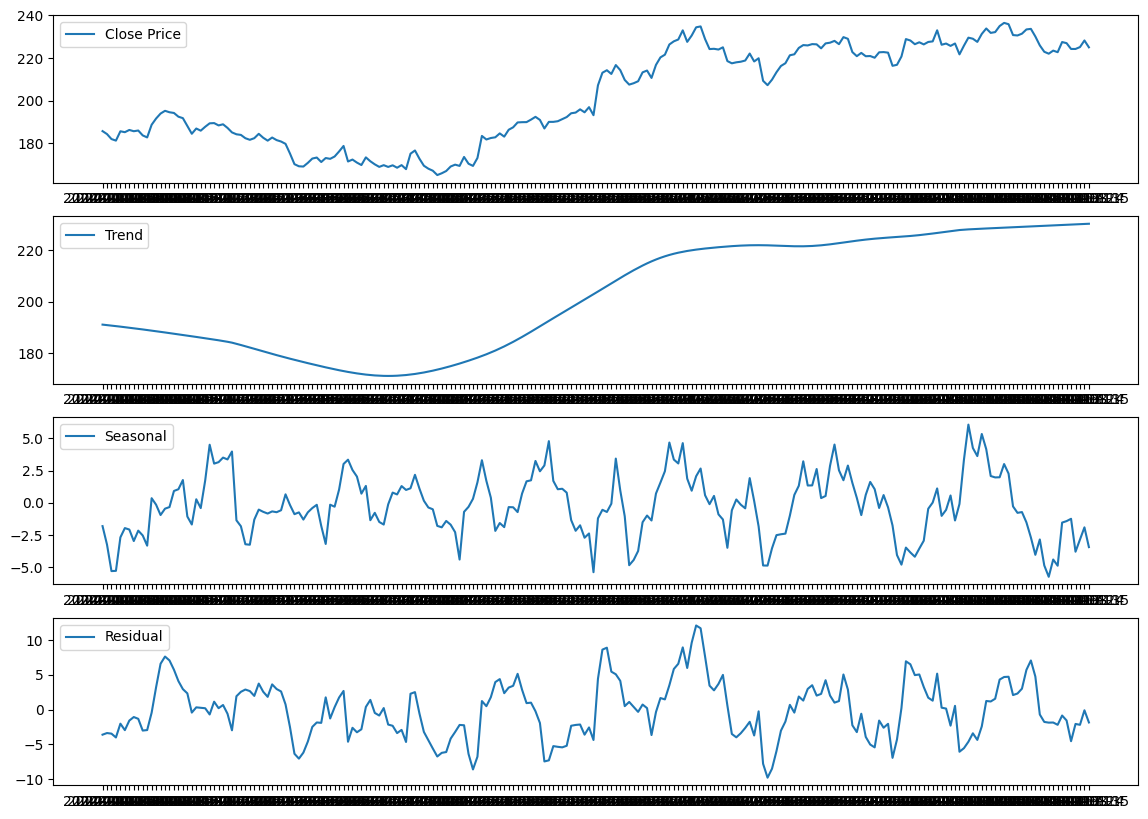

In [ ]:
#Seasonal Trend Decomposition using LOSSES to handle outliers it uses linear regression
from statsmodels.tsa.seasonal import STL
decompostion = STL(data['Close'],period=30)
result = decompostion.fit()

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed,label='Close Price')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid,label='Residual')
plt.legend(loc='upper left')
plt.show()

This function performs the Augmented Dickey-Fuller (ADF) test, which is used to test the stationarity of a time series. Here's a breakdown of the code:

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print("Adf score:",result[0])
    print("P value:",result[1])
    for key,value in result[4].items():
        print("Critical value",(key,value))

In [ ]:
price = data['Close']
adf_test(price)

Adf score: -0.8371164533133036
P value: 0.8079755864157105
Critical value ('1%', -3.4602906385073884)
Critical value ('5%', -2.874708679520702)
Critical value ('10%', -2.573788599127782)


In [ ]:
#KPSS Test for Stationarity
from statsmodels.tsa.stattools import kpss
def kpss_test(series):
    result = kpss(series)
    print("KPSS Stats:",result[0])
    print("P value:",result[1])
    for key,value in result[3].items():
        print("Critical Value:",key,value)

In [ ]:
price = data['Close']
kpss_test(price)

KPSS Stats: 1.8920878328044486
P value: 0.01
Critical Value: 10% 0.347
Critical Value: 5% 0.463
Critical Value: 2.5% 0.574
Critical Value: 1% 0.739


In [ ]:
price = data['Close']

In [ ]:
prices = price.diff().dropna()

In [ ]:
adf_test(prices)

Adf score: -13.954253560092848
P value: 4.6422468136782184e-26
Critical value ('1%', -3.4604283689894815)
Critical value ('5%', -2.874768966942149)
Critical value ('10%', -2.57382076446281)


In [ ]:
from scipy import stats
price_log = np.log(price)
adf_test(price_log)

#price_boxcox,lam = stats.boxcox(price[price>0])

Adf score: -0.8161349857695024
P value: 0.814336532720308
Critical value ('1%', -3.4602906385073884)
Critical value ('5%', -2.874708679520702)
Critical value ('10%', -2.573788599127782)


In [ ]:
price_power = np.sqrt(price)
adf_test(price_power)

Adf score: -0.8244720224658085
P value: 0.8118277021085694
Critical value ('1%', -3.4602906385073884)
Critical value ('5%', -2.874708679520702)
Critical value ('10%', -2.573788599127782)


In [ ]:
window = 12
mean_m = price.rolling(window=window).mean()
moving_price = (price - mean_m).dropna()

In [ ]:
adf_test(moving_price)

Adf score: -4.380919138196966
P value: 0.0003207829660168435
Critical value ('1%', -3.4620315036789666)
Critical value ('5%', -2.8754705024827127)
Critical value ('10%', -2.5741950726860647)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(price,period=30,model='additive')
new_data = (price/decomposition.seasonal).dropna()

White Noise if P-value is greater than 0.05       lb_stat  lb_pvalue
10  14.025574   0.171828
Random Walk if P-value is less than 0.05         lb_stat  lb_pvalue
10  8828.660312        0.0


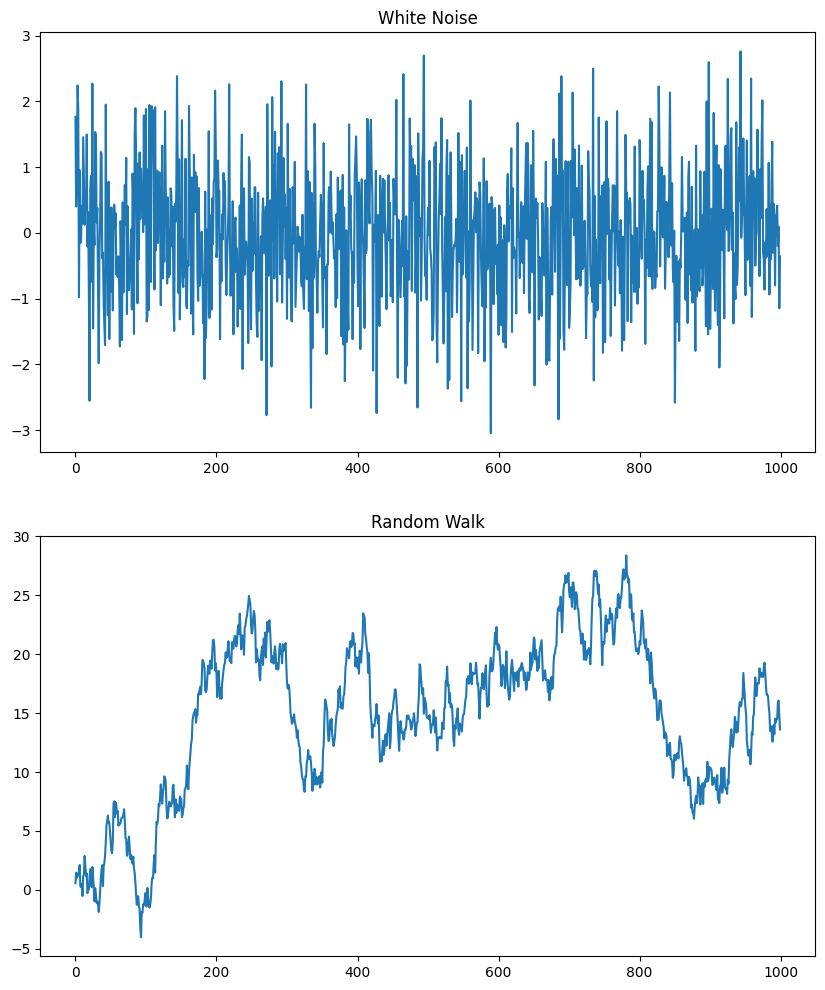

In [ ]:
#acorr_ljungbox Test for Stationarity
from statsmodels.stats.diagnostic import acorr_ljungbox

n = 1000
np.random.seed(0)

#White Noise
white_noise = np.random.normal(0,1,n)

random_walk = np.random.normal(0,1,n)
random_walks = np.cumsum(random_walk)

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.title("White Noise")
plt.plot(white_noise,label="White Noise")

plt.subplot(2,1,2)
plt.plot(random_walks,label='Random Walk')
plt.title("Random Walk")

lb_test_white_noise = acorr_ljungbox(white_noise,lags = [10] , return_df=True)
print("White Noise if P-value is greater than 0.05",lb_test_white_noise)

lb_test_random_walk = acorr_ljungbox(random_walks,lags = [10] , return_df=True)
print("Random Walk if P-value is less than 0.05",lb_test_random_walk)

In [ ]:
stationary_data = data['Close'].diff().dropna()

In [ ]:
adf_test(stationary_data)

Adf score: -13.954253560092848
P value: 4.6422468136782184e-26
Critical value ('1%', -3.4604283689894815)
Critical value ('5%', -2.874768966942149)
Critical value ('10%', -2.57382076446281)


In [ ]:
stationary_data.shape

(221, 1)

In [ ]:
train_data,test_data = stationary_data[:-30],stationary_data[-30:]

In [ ]:
train_data.shape

(191, 1)

In [ ]:
test_data.shape

(30, 1)

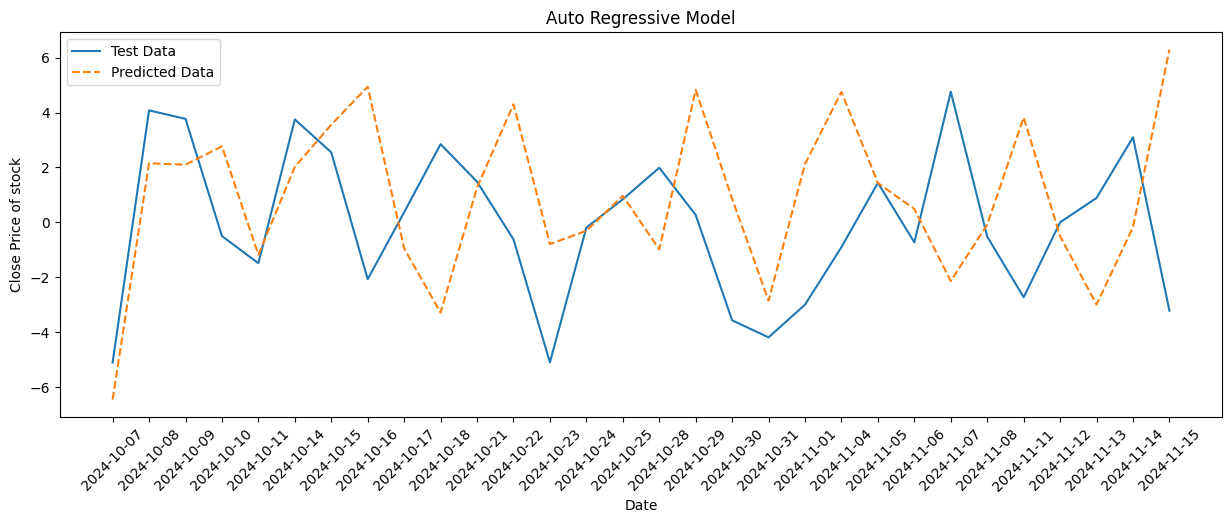

Root Mean Suqared Error is : 3.97


In [ ]:
#AutoReg Model for Stock Price Prediction and Evaluation
model = AutoReg(train_data,lags=30)
model_fit = model.fit()

prediction = model_fit.predict(start = len(train_data),end = len(train_data)+len(test_data)-1,dynamic=False)


plt.figure(figsize=(15,5))
plt.title("Auto Regressive Model")
plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,prediction,label='Predicted Data',linestyle='--')
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price of stock")
plt.show()

rms = round(np.sqrt(mean_squared_error(test_data,prediction)),2)
print("Root Mean Suqared Error is :",rms)

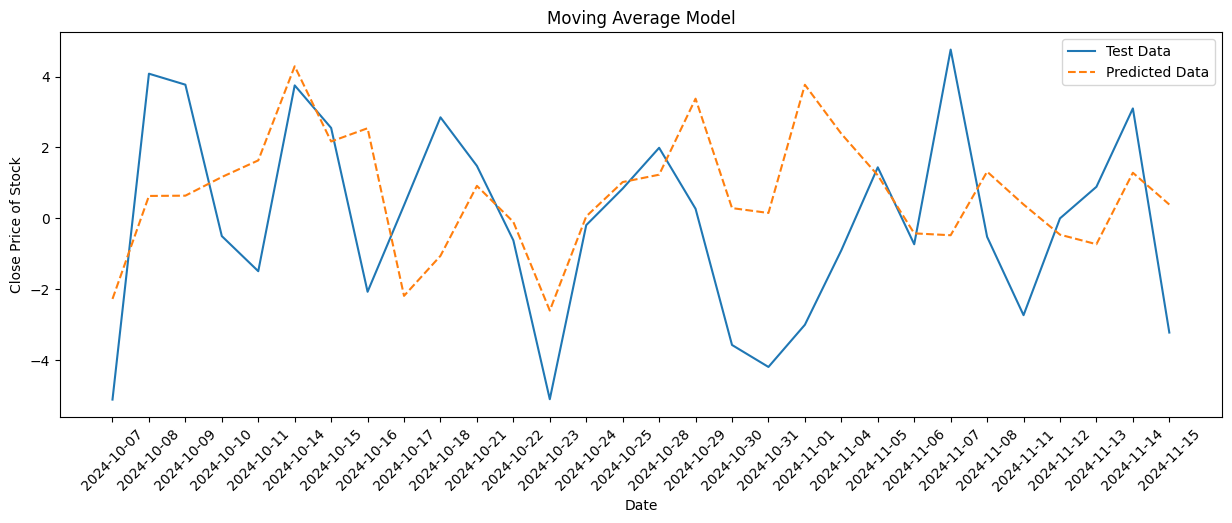

Root Mean Squared Error is: 2.9


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are already defined
model = ARIMA(train_data, order=(0, 0, 30))  # Note the use of statsmodels.tsa.arima.model.ARIMA
model_fit = model.fit()

# Generate predictions
prediction = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plotting the results
plt.figure(figsize=(15, 5))
plt.title("Moving Average Model")
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, prediction, label='Predicted Data', linestyle='--')
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price of Stock")
plt.show()

# Calculate RMSE
rms = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("Root Mean Squared Error is:", rms)


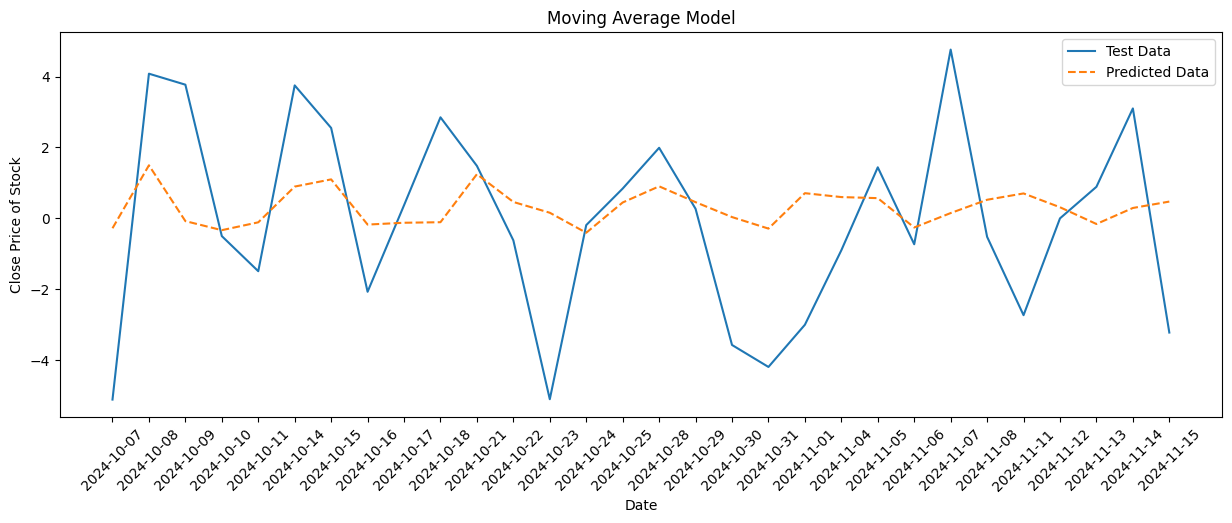

Root Mean Squared Error is: 2.59


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are already defined
model = ARIMA(train_data, order=(5, 1,5))  # Note the use of statsmodels.tsa.arima.model.ARIMA
model_fit = model.fit()

# Generate predictions
prediction = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plotting the results
plt.figure(figsize=(15, 5))
plt.title("Moving Average Model")
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, prediction, label='Predicted Data', linestyle='--')
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price of Stock")
plt.show()

# Calculate RMSE
rms = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("Root Mean Squared Error is:", rms)


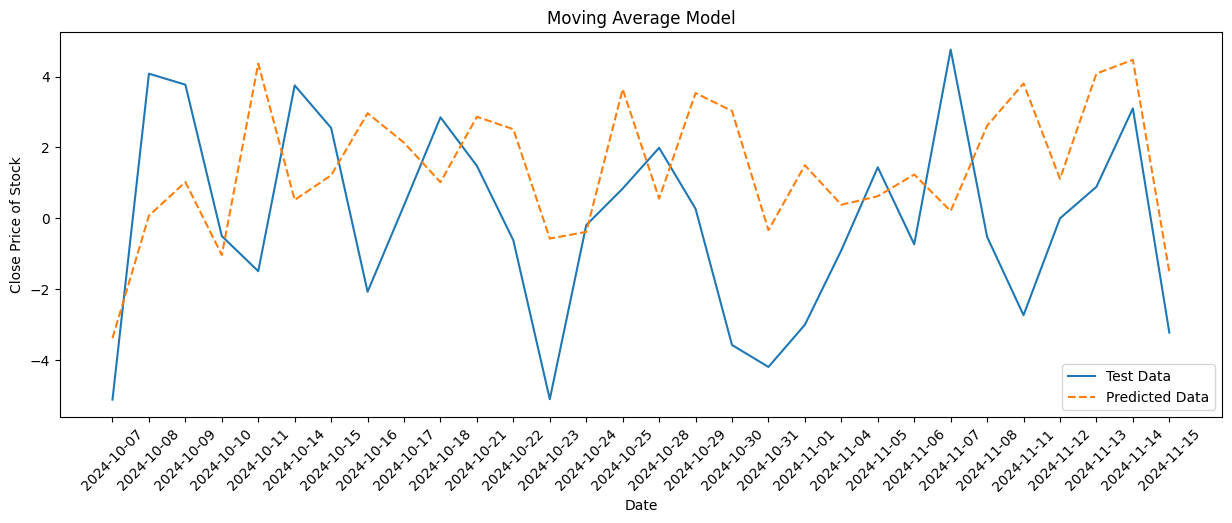

Root Mean Squared Error is: 3.33


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are already defined
model = SARIMAX(train_data, order=(7, 1,7),seasonal_order=(1,1,1,45))  # Note the use of statsmodels.tsa.arima.model.ARIMA
model_fit = model.fit()

# Generate predictions
prediction = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plotting the results
plt.figure(figsize=(15, 5))
plt.title("Moving Average Model")
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, prediction, label='Predicted Data', linestyle='--')
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Close Price of Stock")
plt.show()

# Calculate RMSE
rms = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("Root Mean Squared Error is:", rms)

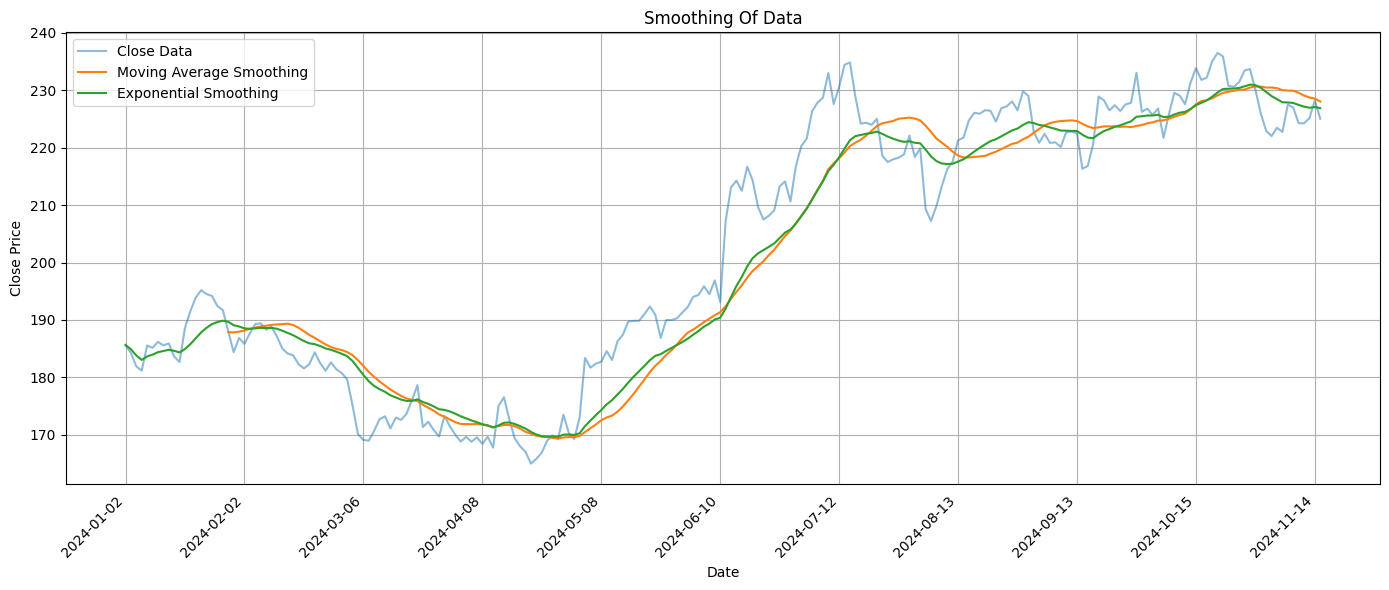

In [ ]:
window_size = 20
MA_Smoothing_data = data['Close'].rolling(window=window_size).mean()

EXP_Smoothing_data = data['Close'].ewm(span=window_size).mean()

plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Data', alpha=0.5)
plt.plot(MA_Smoothing_data, label='Moving Average Smoothing')
plt.plot(EXP_Smoothing_data, label='Exponential Smoothing')

plt.title("Smoothing Of Data")
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.xticks(rotation=45, ha='right')
plt.gca().set_xticks(np.arange(0, len(data), len(data) // 10))
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


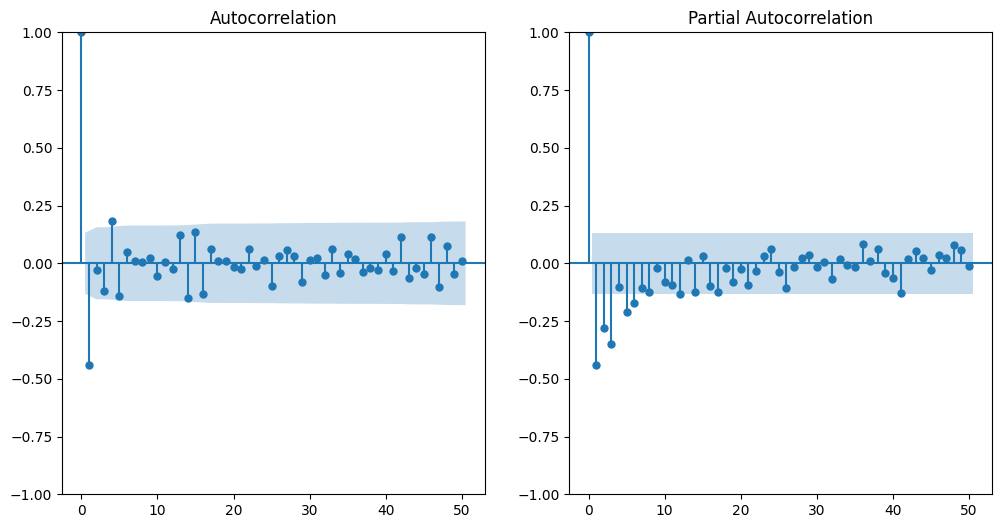

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("ACF Plot")
plot_acf(data['Close'].diff().diff().dropna(),lags=50,ax=plt.gca())

plt.subplot(1,2,2)
plt.title("PACF Plot")
plot_pacf(data['Close'].diff().diff().dropna(),lags=50,ax=plt.gca())
plt.show()

#Conclusion
The project successfully developed a time series forecasting model to predict Apple's stock prices for 2024 with an improved RMSE of 2.59. The application of statistical tests and decomposition techniques enhanced the model's ability to capture trends and seasonal variations, resulting in more accurate predictions. This approach demonstrated the importance of combining robust analytical methods with machine learning techniques for precise stock price forecasting, providing valuable insights for investors and financial analysts.